## Looking at how fast the sudoku solver works


In [53]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np

df = pd.read_csv('sudoku_tst_scores.csv')
df.head()

,date,sudoku,time,difficulty,alg2,version
0,2022-07-30 00:33:22.214405,"""003020600900305001001806400008102900700000008...",0.00232,1,False,v2.11
1,2022-07-30 00:33:22.217619,"""003020600900305001001806400008102900700000008...",0.00216,1,True,v2.11
2,2022-07-30 00:33:22.219949,"""005306078200407005000009106008002034040030010...",0.00167,1,False,v2.11
3,2022-07-30 00:33:22.222150,"""005306078200407005000009106008002034040030010...",0.00155,1,True,v2.11
4,2022-07-30 00:33:22.233287,"""069800500000000103400000020000170000080006000...",0.01052,7,False,v2.11


In [54]:
df_tw = (df
         .assign(sudoku=lambda df_: df_.sudoku.apply(lambda x: x[1:7]),
                 time=df.time * 1000,
                 date=pd.to_datetime(df.date)
            )
        )
df_tw[df_tw.difficulty > 10].tail(20)

,date,sudoku,time,difficulty,alg2,version
888,2023-03-03 21:10:42.318771,005300,374.32,41,True,v6
894,2023-03-03 21:10:46.126946,800000,2754.63,273,True,v6
895,2023-03-03 21:10:46.626138,005300,497.82,47,True,v6
1035,2023-03-03 22:06:06.921165,800000,2723.36,312,True,v6.2
1038,2023-03-03 22:06:07.823565,800000,1078.88,91,True,v6.2
1039,2023-03-03 22:06:07.962801,005300,135.61,17,True,v6.2
1045,2023-03-03 22:06:10.348848,800000,1096.28,160,True,v6.2
1046,2023-03-03 22:06:10.655964,005300,306.30,41,True,v6.2
1052,2023-03-03 22:06:14.043603,800000,2179.52,327,True,v6.2
1053,2023-03-03 22:06:14.377935,005300,333.08,45,True,v6.2


In [55]:
df_pl = (df_tw
         .groupby(by=['sudoku', 'version'])
         .median()
         .reset_index()
        )
df_pl.shape


(63, 5)

<AxesSubplot:xlabel='sudoku', ylabel='difficulty'>

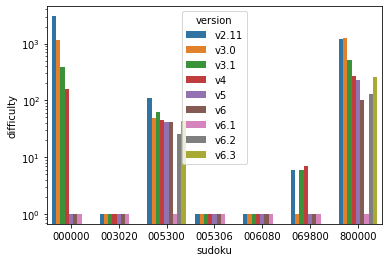

In [56]:
sns.barplot(data=df_pl, x='sudoku', y='difficulty', hue='version', log=True)

In [57]:

df_pl2 = df_tw['version'].value_counts()
df_pl2

v3.1     282
v2.11    181
v5       159
v3.0     158
v6.1     126
v4       103
v6.2      56
v6        18
v6.3      10
Name: version, dtype: int64

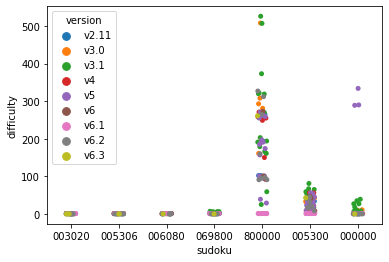

In [58]:
#g = sns.stripplot(data=df_tw[df_tw['Alg2?']==False], x='sudoku', y='Difficulty', hue='Alg2?')
df_tw = df_tw.rename(columns={'Alg2?': 'alg2'})
g = sns.stripplot(data=df_tw.query('alg2==True'), x='sudoku', y='difficulty', hue='version')

<AxesSubplot:xlabel='sudoku', ylabel='time'>

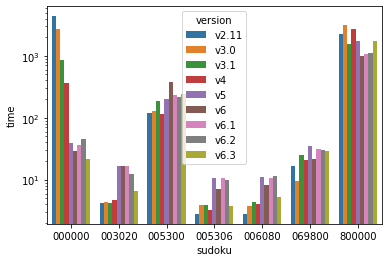

In [59]:
sns.barplot(data=df_pl, x='sudoku', y='time', hue='version', log=True)